In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [90]:
# chargement desdonnées 
data=pd.read_csv("train.csv")

In [91]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [92]:
data.shape

(891, 12)

In [93]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [94]:
#supprimer les colonnes non désirer
data=data.drop(['PassengerId', 'Name', 'SibSp','Ticket','Cabin'], axis=1)

In [95]:
data

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S
887,1,1,female,19.0,0,30.0000,S
888,0,3,female,NaN,2,23.4500,S
889,1,1,male,26.0,0,30.0000,C


In [96]:
#afficher les survivants et les non-survivants
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [97]:
#convertir les variables catégoriques
data['Sex']=data['Sex'].map({'female':0, 'male':1})

In [98]:
data['Embarked']=data['Embarked'].map({'S':0, 'C':1, "Q":2})

In [99]:
data

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,1,22.0,0,7.2500,0.0
1,1,1,0,38.0,0,71.2833,1.0
2,1,3,0,26.0,0,7.9250,0.0
3,1,1,0,35.0,0,53.1000,0.0
4,0,3,1,35.0,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000,0.0
887,1,1,0,19.0,0,30.0000,0.0
888,0,3,0,NaN,2,23.4500,0.0
889,1,1,1,26.0,0,30.0000,1.0


In [100]:
#afficher le tableau des statistiques
data.describe()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.647587,29.699118,0.381594,32.204208,0.362205
std,0.486592,0.836071,0.477990,14.526497,0.806057,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,6.000000,512.329200,2.000000


In [101]:
#afficher les variables contenant les données manquantes
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Parch         0
Fare          0
Embarked      2
dtype: int64

In [102]:
#Éliminer les données manquantes
data= data.dropna(axis=0)

In [103]:
data.describe()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.432584,34.567251,0.261236
std,0.491139,0.836854,0.481420,14.492933,0.854181,52.938648,0.521561
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,8.050000,0.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,15.645850,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,33.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,6.000000,512.329200,2.000000


In [104]:
#afficher les variables contenant les données manquantes
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

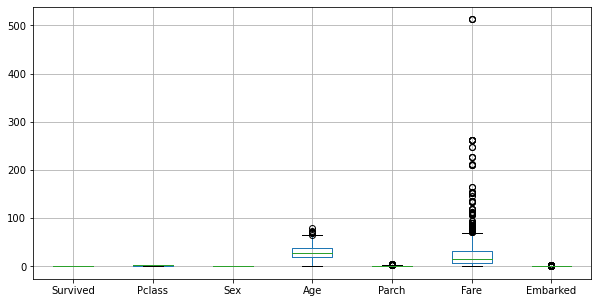

In [105]:
#afficher les valeurs abberrantes
data.boxplot(figsize=(10,5))

In [106]:
from sklearn.model_selection import train_test_split
import time

X=data.drop(['Survived'], axis=1).values
y=data['Survived'].values

In [107]:
X

array([[ 3.    ,  1.    , 22.    ,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  0.    , 38.    ,  0.    , 71.2833,  1.    ],
       [ 3.    ,  0.    , 26.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 1.    ,  0.    , 19.    ,  0.    , 30.    ,  0.    ],
       [ 1.    ,  1.    , 26.    ,  0.    , 30.    ,  1.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  7.75  ,  2.    ]])

In [108]:
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [109]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.4, random_state=0)

# MLP sans preprocessing

In [111]:
#MLP sans preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
params={'alpha':[0.00001,0.0001, 0.001,0.01,0.05],
        'hidden_layer_sizes':[50,(500,300),(400,350,100)]}

start_time = time.time()
model= MLPClassifier( random_state=0)
grid_search=  GridSearchCV(estimator=model, param_grid=params,verbose=True)
grid_search.fit(X_train,y_train)
end_time = time.time()


print("temps ecoule =" +str(end_time - start_time))
print("meilleur score est :{}"  .format(grid_search.best_score_))
print("meilleur parametre:{}"  .format(grid_search.best_params_))


Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

temps ecoule =171.6468803882599
meilleur score est :0.7751846785225718
meilleur parametre:{'alpha': 0.05, 'hidden_layer_sizes': (500, 300)}


# MLP avc preprocessing  "StandardScaler"

In [115]:
from sklearn.preprocessing import StandardScaler
#normaliser les valeurs
scaler= StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


params={'alpha':[0.00001,0.0001, 0.001,0.01,0.05],
        'hidden_layer_sizes':[50,(500,300),(400,350,100)]}

start_time = time.time()
model= MLPClassifier( random_state=0)
grid_search=  GridSearchCV(estimator=model, param_grid=params,verbose=True)
grid_search.fit(X_train,y_train)
end_time = time.time()


print("temps ecoule =" +str(end_time - start_time))
print("meilleur score est :{}"  .format(grid_search.best_score_))
print("meilleur parametre:{}"  .format(grid_search.best_params_))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

temps ecoule =245.10417079925537
meilleur score est :0.8126675786593707
meilleur parametre:{'alpha': 1e-05, 'hidden_layer_sizes': 50}


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# MLP avec preprocessing "MinMaxScaler"

In [19]:
from sklearn.preprocessing import MinMaxScaler
#normaliser les valeurs
mms= MinMaxScaler()
data_mms= pd.DataFrame(mms.fit_transform(data),columns=data.columns)

In [20]:
data_mms

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0.0,1.0,1.0,0.271174,0.000000,0.014151,0.0
1,1.0,0.0,0.0,0.472229,0.000000,0.139136,0.5
2,1.0,1.0,0.0,0.321438,0.000000,0.015469,0.0
3,1.0,0.0,0.0,0.434531,0.000000,0.103644,0.0
4,0.0,1.0,1.0,0.434531,0.000000,0.015713,0.0
...,...,...,...,...,...,...,...
707,0.0,1.0,0.0,0.484795,0.833333,0.056848,1.0
708,0.0,0.5,1.0,0.334004,0.000000,0.025374,0.0
709,1.0,0.0,0.0,0.233476,0.000000,0.058556,0.0
710,1.0,0.0,1.0,0.321438,0.000000,0.058556,0.5


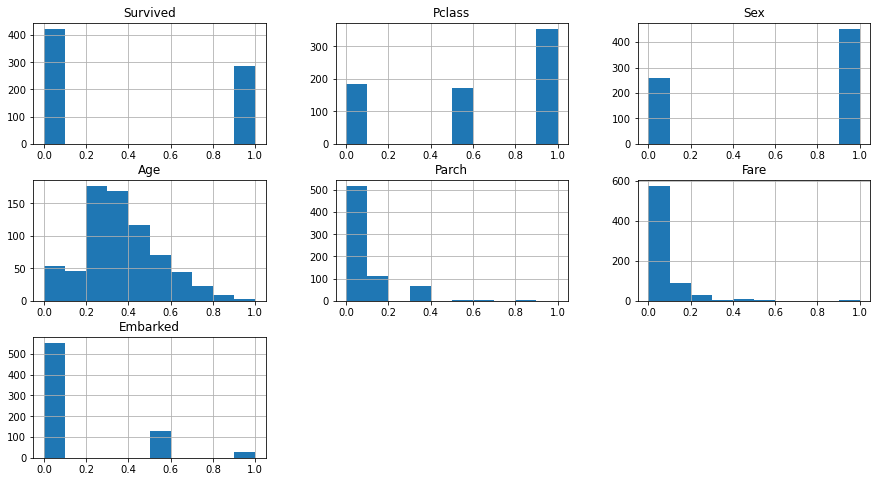

In [21]:
data_mms.hist(figsize=(15,8));

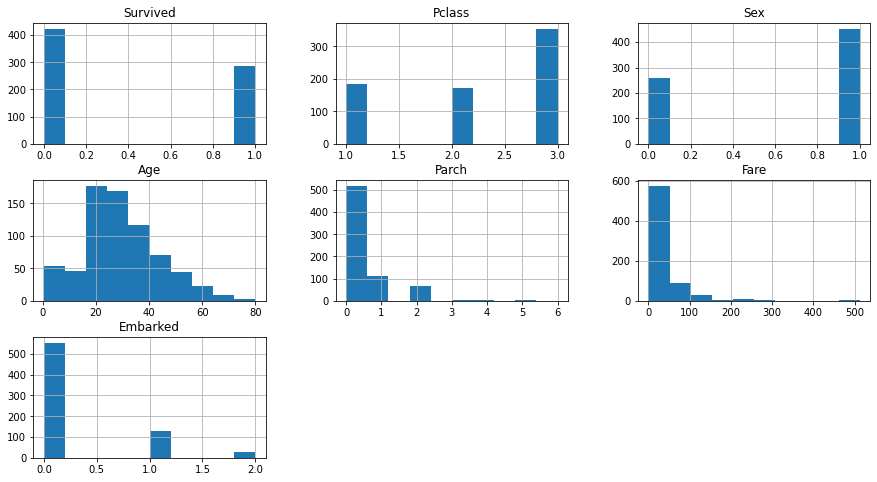

In [22]:
data.hist(figsize=(15,8));

In [23]:
from sklearn.model_selection import train_test_split
import time

X= data_mms.drop(['Survived'], axis=1).values
y= data_mms['Survived'].values


In [24]:
X

array([[1.        , 1.        , 0.27117366, 0.        , 0.01415106,
        0.        ],
       [0.        , 0.        , 0.4722292 , 0.        , 0.13913574,
        0.5       ],
       [1.        , 0.        , 0.32143755, 0.        , 0.01546857,
        0.        ],
       ...,
       [0.        , 0.        , 0.23347575, 0.        , 0.0585561 ,
        0.        ],
       [0.        , 1.        , 0.32143755, 0.        , 0.0585561 ,
        0.5       ],
       [1.        , 1.        , 0.39683338, 0.        , 0.01512699,
        1.        ]])

In [25]:
y

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0.

In [26]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.4, random_state=0)

In [27]:
#MLP avec standardisation
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

#création des paramétres
para= {'alpha':[0.00001,0.00009 ,0.0001, 0.001, 0.005,0.01, 0.1, 0.8], 'solver':['lbfgs','sgd','adam'], 'hidden_layer_sizes':[(50),(100,150),(200,500,100)]}
mod= GridSearchCV(MLPClassifier(), para, cv=2)

mod.fit(X_train, y_train)

print("les valeurs de paramètres optimales sont:\n",mod.best_params_)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the

les valeurs de paramètres optimales sont:
 {'alpha': 1e-05, 'hidden_layer_sizes': (100, 150), 'solver': 'adam'}


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
#tester les paramètres
start_time = time.time()
clf = MLPClassifier(solver= 'adam',hidden_layer_sizes=(100,150),alpha=1e-05, random_state=0)
clf.fit(X_train, y_train)
end_time = time.time()
y_pred = clf.predict(X_test)
gain = clf.score(X_test,y_test)
print('le score:', gain)
print('temps ecoule =' +str(end_time - start_time))

le score: 0.8210526315789474
temps ecoule =0.5103433132171631


# MLP avec preprocessing "MaxAbsScaler"

In [37]:
from sklearn.preprocessing import MaxAbsScaler
#normaliser les valeurs
mas= MaxAbsScaler()
data_mas= pd.DataFrame(mas.fit_transform(data),columns=data.columns)

In [38]:
data_mas

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0.0,1.000000,1.0,0.2750,0.000000,0.014151,0.0
1,1.0,0.333333,0.0,0.4750,0.000000,0.139136,0.5
2,1.0,1.000000,0.0,0.3250,0.000000,0.015469,0.0
3,1.0,0.333333,0.0,0.4375,0.000000,0.103644,0.0
4,0.0,1.000000,1.0,0.4375,0.000000,0.015713,0.0
...,...,...,...,...,...,...,...
707,0.0,1.000000,0.0,0.4875,0.833333,0.056848,1.0
708,0.0,0.666667,1.0,0.3375,0.000000,0.025374,0.0
709,1.0,0.333333,0.0,0.2375,0.000000,0.058556,0.0
710,1.0,0.333333,1.0,0.3250,0.000000,0.058556,0.5


In [39]:
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import Perceptron

X= data_mas.drop(['Survived'], axis=1).values
y= data_mas['Survived'].values

In [40]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.4, random_state=0)

In [41]:
#MLP avec standardisation
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

#création des paramétres
para= {'alpha':[0.00001,0.00009 ,0.0001, 0.001, 0.005,0.01, 0.1, 0.8], 'solver':['lbfgs','sgd','adam'], 'hidden_layer_sizes':[(50),(100,150),(200,500,100)]}
mod= GridSearchCV(MLPClassifier(), para, cv=2)

mod.fit(X_train, y_train)

print("les valeurs de paramètres optimales sont:\n",mod.best_params_)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the

les valeurs de paramètres optimales sont:
 {'alpha': 0.001, 'hidden_layer_sizes': (100, 150), 'solver': 'adam'}


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
#tester les paramètres
start_time = time.time()
clf = MLPClassifier(solver= 'adam',hidden_layer_sizes=(100,150),alpha=0.001, random_state=0)
clf.fit(X_train, y_train)
end_time = time.time()
y_pred = clf.predict(X_test)
gain = clf.score(X_test,y_test)
print('le score:', gain)
print('temps ecoule =' +str(end_time - start_time))

le score: 0.7789473684210526
temps ecoule =0.8211700916290283


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# MLP avec preprocessing "RobustScaler"

In [43]:
from sklearn.preprocessing import RobustScaler
#normaliser les valeurs
rs= MaxAbsScaler()
data_rs= pd.DataFrame(rs.fit_transform(data),columns=data.columns)

In [44]:
data_rs

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0.0,1.000000,1.0,0.2750,0.000000,0.014151,0.0
1,1.0,0.333333,0.0,0.4750,0.000000,0.139136,0.5
2,1.0,1.000000,0.0,0.3250,0.000000,0.015469,0.0
3,1.0,0.333333,0.0,0.4375,0.000000,0.103644,0.0
4,0.0,1.000000,1.0,0.4375,0.000000,0.015713,0.0
...,...,...,...,...,...,...,...
707,0.0,1.000000,0.0,0.4875,0.833333,0.056848,1.0
708,0.0,0.666667,1.0,0.3375,0.000000,0.025374,0.0
709,1.0,0.333333,0.0,0.2375,0.000000,0.058556,0.0
710,1.0,0.333333,1.0,0.3250,0.000000,0.058556,0.5


In [45]:
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import Perceptron

X= data_rs.drop(['Survived'], axis=1).values
y= data_rs['Survived'].values

In [46]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.4, random_state=0)

In [47]:
#MLP avec standardisation
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

#création des paramétres
para= {'alpha':[0.00001,0.00009 ,0.0001, 0.001, 0.005,0.01, 0.1], 'solver':['lbfgs','sgd','adam'], 'hidden_layer_sizes':[(50),(100,150), (500,300),(200,500,100)]}
mod= GridSearchCV(MLPClassifier(), para, cv=2)

mod.fit(X_train, y_train)

print("les valeurs de paramètres optimales sont:\n",mod.best_params_)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the

les valeurs de paramètres optimales sont:
 {'alpha': 9e-05, 'hidden_layer_sizes': (100, 150), 'solver': 'adam'}


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
#tester les paramètres
start_time = time.time()
clf = MLPClassifier(solver= 'adam',hidden_layer_sizes=(100,150),alpha=9e-05, random_state=0)
clf.fit(X_train, y_train)
end_time = time.time()
y_pred = clf.predict(X_test)
gain = clf.score(X_test,y_test)
print('le score:', gain)
print('temps ecoule =' +str(end_time - start_time))

le score: 0.7789473684210526
temps ecoule =0.8014407157897949


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
